In [1]:
from pyNN.morphology import NeuroMLMorphology, load_morphology, uniform, random_section, dendrites, apical_dendrites, by_distance
import pyNN.arborproto as sim
from pyNN.space import Grid2D, RandomStructure, Sphere

In [2]:
neuroml_morph = load_morphology("single_cell_detailed.swc", replace_axon=None)

In [3]:
cc = sim.MultiCompartmentNeuron.setup(
				label="MyCell",
				ion_channels={'pas': sim.PassiveLeak,
							  'na': sim.NaChannel,
							  'kdr': sim.KdrChannel},
				ionic_species={'na_ion': sim.NaIon,
							   'k_ion': sim.KIon},)

In [4]:
mycell = cc(morphology=neuroml_morph,
			cm=1.0,
			Ra=500.0,
			na_ion = {"internal_concentration": 10, "external_concentration": 140, "reversal_potential": 50},
			k_ion = {"internal_concentration": 54.4, "external_concentration": 2.5, "reversal_potential": -77},
			pas={"conductance_density": uniform('all', 0.0003), "e_rev":-54.3},
			na={"conductance_density": uniform('soma', 0.120), "e_rev": 50.0},
			kdr={"conductance_density": uniform('dend', 0.001), "e_rev": -77.0},)

In [5]:
cells = sim.Population(1, mycell, initial_values={'v': [-55]})

In [6]:
step_current = sim.DCSource(amplitude=5.0, start=50.0, stop=150.0)
# step_current.inject_into(cells[0:1], location="soma")
# step_current.inject_into(cells[1:2], location=random_section(apical_dendrites()))
cells = step_current.inject_into(cells[0:1], location="soma")

In [7]:
# cells.record('spikes')
# cells.record(['na.m', 'na.h', 'kdr.n'], locations={'soma': 'soma'})
# cells.record('v', locations={'soma': 'soma', 'dendrite': random_section(apical_dendrites())})

In [8]:
# sim.run(200.0)
sim.state.run(200.0, cells)

In [9]:
if len(sim.state.model.spikes) > 0:
    print("{} spikes:".format(len(sim.state.model.spikes)))
    for s in sim.state.model.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

3 spikes:
10.812
30.832
50.834


In [10]:
from matplotlib import pyplot

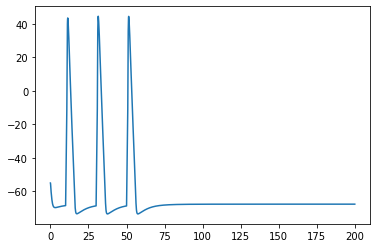

In [12]:
pyplot.plot(sim.state.model.traces[0].time, sim.state.model.traces[0].value)

[10.811716637237645, 30.831771406609164, 50.833796178730736]